# Real world data analysis project

Hello, **I'm Ademola Abraham Adeshina**, **a Health Information Data analyst** and I will be working on a real world dataset called **`breast cancer Dataset`** alongside with its **`Metadata`**. The Breast cancer dataset which is in the CSV format was gotten from [data.mendeley.com](https://data.mendeley.com/datasets/63fpbc9cm4/2).

I will be making use of Python data analysis libaries to analyze, query and visualize the Dataset and then find answers and solutions to questions and problems in the Data.

# Data Description

The Dataset consist of 213 patients observation, which was obtained from the University of Calabar Teaching Hospital Cancer registry from january 2019 to August 2020, which is located in Nigeria.
The Data include 11 features, which are;

* Year of diagnosis
* Age of patient
* menopause status
* tumor size(cm)
* number of invasive nodes
* part of breast affected(left or right)
* metastasis
* quadrant of the breast affected
* history of breast disease
* diagnosis result(benign or malignant)

## Importing Python libaries that will be used for data analysis and vsualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
%matplotlib inline

# Data Preparation

In [2]:
os.listdir('C:/Users/MR ADEMOLA/Desktop/New folder (2)/3') # Checking for the location of the breast cancer dataset

['breast-cancer-dataset.csv',
 'breast-cancer-metadata.csv',
 'cleaned-breast-cancer-dataset.csv',
 'excel_cleaned_breast-cancer-dataset.csv']

In [3]:
raw_data = pd.read_csv(r'C:\Users\MR ADEMOLA\Desktop\New folder (2)\3\breast-cancer-dataset.csv') 
raw_data # Loading the dataset into the jupyter notebook(Working space) with pandas for analysis

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [4]:
data = raw_data.copy() # Making a copy of the original loaded dataset
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209,2020,49,1,6,3,Right,1,Lower inner,1,Malignant
209,210,2020,28,1,3,0,Left,0,Upper inner,0,Benign
210,211,2020,22,1,1,0,Left,0,Upper outer,1,Benign
211,212,2020,19,1,1,0,Left,0,Lower inner,1,Benign


In [5]:
metadata = pd.read_csv(r'C:\Users\MR ADEMOLA\Desktop\New folder (2)\3\breast-cancer-metadata.csv',index_col='Column Header')['Column Description']
metadata # Loading the Metadata into the jupyter notebook(Working space) with pandas

Column Header
S/N                            Unique identification for each patient
Year                                 The year diagnosis was conducted
Age                            Age of patient at the time of diagnose
Menopause           Whether the patient is pro or postmenopausal a...
Tumor size                The size in centimeter of the excised tumor
Involved nodes      The number of axillary lymph nodes that contai...
Breast                         If it occurs on the left or right side
Metastatic          If the cancer has spread to other part of the ...
Breast quadrant     The gland is divided into 4 sections with nipp...
History             If the patient has any history or family histo...
Diagnosis result               Instances of the breast cancer dataset
Name: Column Description, dtype: object

In [6]:
metadata['History']

'If the patient has any history or family history on cancer'

with this, we are now done loading our dataset and metadata, we can now proceed to the next step of preprocessing and cleaning of the data for analysis.

# Data cleaning

In [7]:
data.duplicated().sum() # Checking for duplicated rows(repeated datas)

0

In [8]:
data.isnull().sum() # checking for null values

S/N                 0
Year                0
Age                 0
Menopause           0
Tumor Size (cm)     0
Inv-Nodes           0
Breast              0
Metastasis          0
Breast Quadrant     0
History             0
Diagnosis Result    0
dtype: int64

In [9]:
data.columns # checking the columns in the dataset

Index(['S/N', 'Year', 'Age', 'Menopause', 'Tumor Size (cm)', 'Inv-Nodes',
       'Breast', 'Metastasis', 'Breast Quadrant', 'History',
       'Diagnosis Result'],
      dtype='object')

In [10]:
data.shape # checking for the number of rows and columns of the whole data

(213, 11)

In [11]:
data.info() # Checking the summarized form of the data in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   S/N               213 non-null    int64 
 1   Year              213 non-null    object
 2   Age               213 non-null    int64 
 3   Menopause         213 non-null    int64 
 4   Tumor Size (cm)   213 non-null    object
 5   Inv-Nodes         213 non-null    object
 6   Breast            213 non-null    object
 7   Metastasis        213 non-null    object
 8   Breast Quadrant   213 non-null    object
 9   History           213 non-null    object
 10  Diagnosis Result  213 non-null    object
dtypes: int64(3), object(8)
memory usage: 18.4+ KB


In [12]:
data.nunique() # Checking the number of unique values in each columns

S/N                 213
Year                  3
Age                  58
Menopause             2
Tumor Size (cm)      13
Inv-Nodes             4
Breast                3
Metastasis            3
Breast Quadrant       6
History               3
Diagnosis Result      2
dtype: int64

In [13]:
data['Year'].unique() # Unique values in the Year columns

array(['2019', '#', '2020'], dtype=object)

In [14]:
data.where((data['Year'] != '#'), np.nan, inplace=True) # replacing the # value with a null value in the Year column

In [15]:
data['Year'].unique()

array(['2019', nan, '2020'], dtype=object)

In [16]:
data.Age.unique() # Unique values in the Age column

array([40., 39., 45., 26., 21., 50., 58., 35., 42., 41., 43., 30., 33.,
       38., 60., 47., 57., 34., 31., 36., 56., 48., 61., 20., nan, 37.,
       27., 25., 17., 23., 59., 67., 46., 24., 49., 53., 28., 68., 64.,
       18., 14., 15., 54., 71., 55., 22., 65., 19., 52., 51., 44., 63.,
       29., 32., 62., 69., 13., 16., 77.])

In [17]:
data.Menopause.unique() # Unique values in the Menopause column

array([ 1.,  0., nan])

In [18]:
data['Tumor Size (cm)'].unique() # Unique values in the Tumor size column

array(['2', '4', '3', '1', '5', '6', '7', '10', '8', '9', nan, '14', '12'],
      dtype=object)

In [19]:
data['Inv-Nodes'].unique() # Unique values in the Involved nodes columns

array(['0', '1', nan, '3'], dtype=object)

In [20]:
data['Breast'].unique() # Unique values in the Breast column

array(['Right', 'Left', nan, '#'], dtype=object)

In [21]:
data.where((data['Breast'] != '#'), np.nan, inplace=True) # replacing the # values with a null value in the Breast column

In [22]:
data['Breast'].unique()

array(['Right', 'Left', nan], dtype=object)

In [23]:
data['Metastasis'].unique() # Unique values in the Metastasis column

array(['0', '1', nan], dtype=object)

In [24]:
data['Breast Quadrant'].unique() # Unique values in the Breast Quadrant column

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', '#',
       nan, 'Upper outer '], dtype=object)

In [25]:
data.where((data['Breast Quadrant'] != '#'), np.nan, inplace=True) # replacing #values with null values in the column
data['Breast Quadrant'] = data['Breast Quadrant'].str.strip()

In [26]:
data['Breast Quadrant'].unique()

array(['Upper inner', 'Upper outer', 'Lower outer', 'Lower inner', nan],
      dtype=object)

In [27]:
data['History'].unique() # Unique values in the History column

array(['0', '1', nan, '#'], dtype=object)

In [28]:
data.where(~(data.History == '#'), np.nan, inplace=True) # replacing #values with null values

In [29]:
data['History'].unique()

array(['0', '1', nan], dtype=object)

In [30]:
data['Diagnosis Result'].unique()

array(['Benign', 'Malignant', nan], dtype=object)

In [31]:
data.isnull().sum() # Checking the number of null values in each columns of the dataset

S/N                 8
Year                8
Age                 8
Menopause           8
Tumor Size (cm)     8
Inv-Nodes           8
Breast              8
Metastasis          8
Breast Quadrant     8
History             8
Diagnosis Result    8
dtype: int64

In [32]:
data.dropna(inplace=True) # removing the null values from the dataset
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1.0,2019,40.0,1.0,2,0,Right,0,Upper inner,0,Benign
1,2.0,2019,39.0,1.0,2,0,Left,0,Upper outer,0,Benign
2,3.0,2019,45.0,0.0,4,0,Left,0,Lower outer,0,Benign
3,4.0,2019,26.0,1.0,3,0,Left,0,Lower inner,1,Benign
4,5.0,2019,21.0,1.0,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
208,209.0,2020,49.0,1.0,6,3,Right,1,Lower inner,1,Malignant
209,210.0,2020,28.0,1.0,3,0,Left,0,Upper inner,0,Benign
210,211.0,2020,22.0,1.0,1,0,Left,0,Upper outer,1,Benign
211,212.0,2020,19.0,1.0,1,0,Left,0,Lower inner,1,Benign


In [33]:
data.reset_index(drop=True, inplace=True) # resetting the index of the dataset in an orderly manner
data

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1.0,2019,40.0,1.0,2,0,Right,0,Upper inner,0,Benign
1,2.0,2019,39.0,1.0,2,0,Left,0,Upper outer,0,Benign
2,3.0,2019,45.0,0.0,4,0,Left,0,Lower outer,0,Benign
3,4.0,2019,26.0,1.0,3,0,Left,0,Lower inner,1,Benign
4,5.0,2019,21.0,1.0,1,0,Right,0,Upper outer,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
200,209.0,2020,49.0,1.0,6,3,Right,1,Lower inner,1,Malignant
201,210.0,2020,28.0,1.0,3,0,Left,0,Upper inner,0,Benign
202,211.0,2020,22.0,1.0,1,0,Left,0,Upper outer,1,Benign
203,212.0,2020,19.0,1.0,1,0,Left,0,Lower inner,1,Benign


In [34]:
data.dtypes # checking the datatypes of each column

S/N                 float64
Year                 object
Age                 float64
Menopause           float64
Tumor Size (cm)      object
Inv-Nodes            object
Breast               object
Metastasis           object
Breast Quadrant      object
History              object
Diagnosis Result     object
dtype: object

In [35]:
# changing the data type of each columns to the appropriate data types

data['Diagnosis Result'] = data['Diagnosis Result'].astype('category')
data['Tumor Size (cm)'] = pd.to_numeric(data['Tumor Size (cm)'])
data['Age'] = pd.to_numeric(data['Age']).astype('int32')
data['S/N'] = pd.to_numeric(data['S/N']).astype('int32')
data['Menopause'] = data['Menopause'].astype('int32')
data['Inv-Nodes'] = pd.to_numeric(data['Inv-Nodes'])
data['Breast'] = data['Breast'].astype('string')
data['Breast Quadrant'] = data['Breast Quadrant'].astype('string')
data['History'] = pd.to_numeric(data['History']).astype('bool')
data['Year'] = pd.to_numeric(data['Year']).astype('int32')
data['Metastasis'] = data['Metastasis'].astype('int32').astype('bool')

In [36]:
data.dtypes # checking the new datatypes of each column

S/N                    int32
Year                   int32
Age                    int32
Menopause              int32
Tumor Size (cm)        int64
Inv-Nodes              int64
Breast                string
Metastasis              bool
Breast Quadrant       string
History                 bool
Diagnosis Result    category
dtype: object

In [37]:
for n,num in zip(data.index,data['Menopause']):
    if num == 0:
        data['Menopause'].loc[n] = 'Post Menopause'
    else:
        data['Menopause'].loc[n] = 'Pre Menopause'
    # changing the data of the Menopause column(1 or 0) to a more detailed data(Post menopause or Pre menopause)
data['Menopause'] = data['Menopause'].astype('string')

C:\Users\MR ADEMOLA\AppData\Local\Temp\ipykernel_3776\766033030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Menopause'].loc[n] = 'Pre Menopause'


In [38]:
data.info() # checking the summarized form of the datas in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   S/N               205 non-null    int32   
 1   Year              205 non-null    int32   
 2   Age               205 non-null    int32   
 3   Menopause         205 non-null    string  
 4   Tumor Size (cm)   205 non-null    int64   
 5   Inv-Nodes         205 non-null    int64   
 6   Breast            205 non-null    string  
 7   Metastasis        205 non-null    bool    
 8   Breast Quadrant   205 non-null    string  
 9   History           205 non-null    bool    
 10  Diagnosis Result  205 non-null    category
dtypes: bool(2), category(1), int32(3), int64(2), string(3)
memory usage: 11.3 KB


In [39]:
data.describe() # Statistical summary of the dataset

,S/N,Year,Age,Tumor Size (cm),Inv-Nodes
count,205.000000,205.000000,205.000000,205.000000,205.000000
mean,107.063415,2019.521951,39.712195,4.287805,0.356098
std,61.700978,0.500741,14.161883,2.572497,0.509733
min,1.000000,2019.000000,13.000000,1.000000,0.000000
25%,55.000000,2019.000000,30.000000,2.000000,0.000000
50%,107.000000,2020.000000,40.000000,4.000000,0.000000
75%,159.000000,2020.000000,49.000000,6.000000,1.000000
max,213.000000,2020.000000,77.000000,14.000000,3.000000


This marks the end of Data Preparation and Cleaning, we can now proceed to the next phase

# Exploratory Analysis and Visualiztion of Data

In [40]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,5)

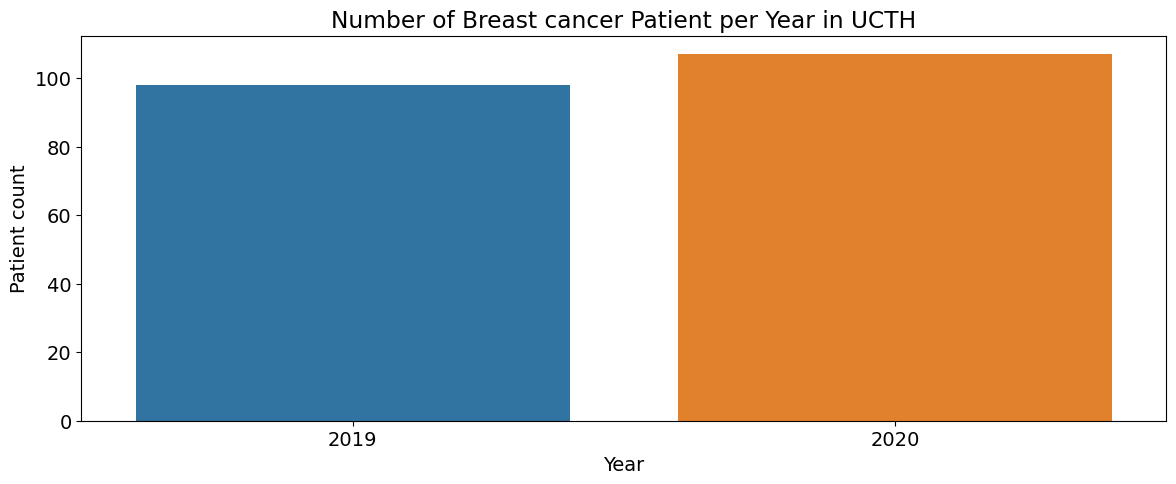

In [41]:
sns.countplot(data, x='Year')
plt.title('Number of Breast cancer Patient per Year in UCTH')
plt.ylabel('Patient count');

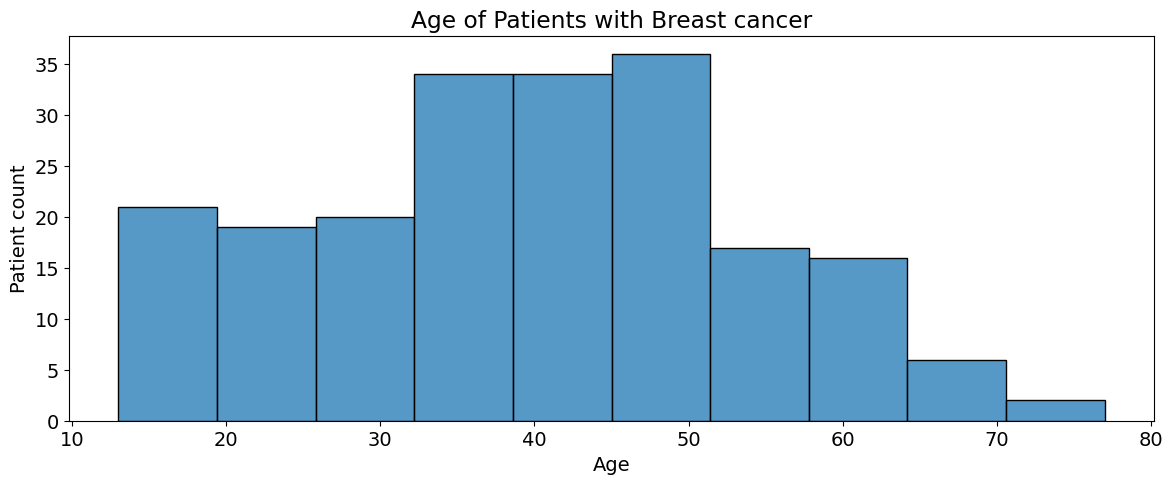

In [42]:
sns.histplot(data=data, x='Age')
plt.title('Age of Patients with Breast cancer')
plt.ylabel('Patient count');

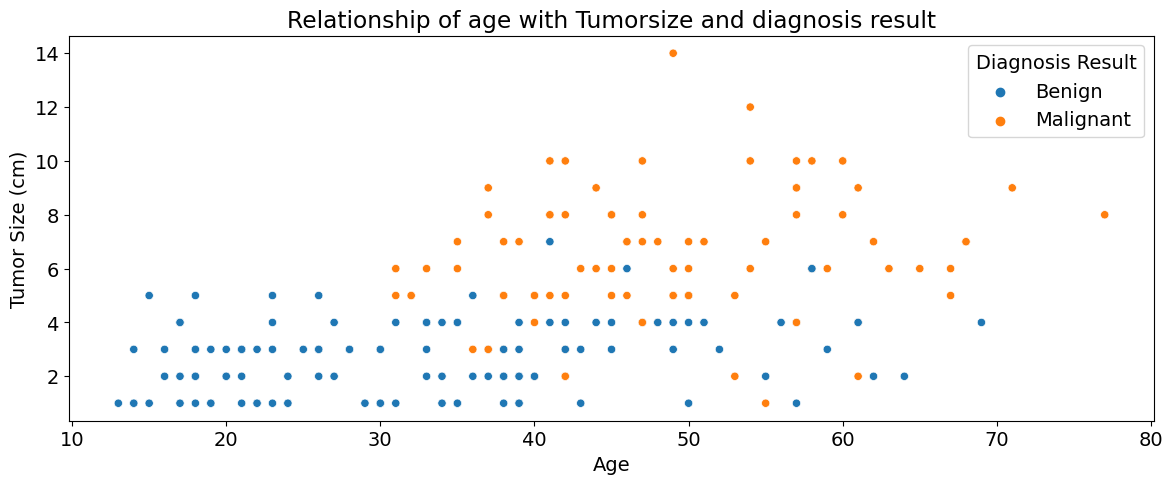

In [43]:
sns.scatterplot(data=data,x='Age', y='Tumor Size (cm)', hue='Diagnosis Result')
plt.title('Relationship of age with Tumorsize and diagnosis result');

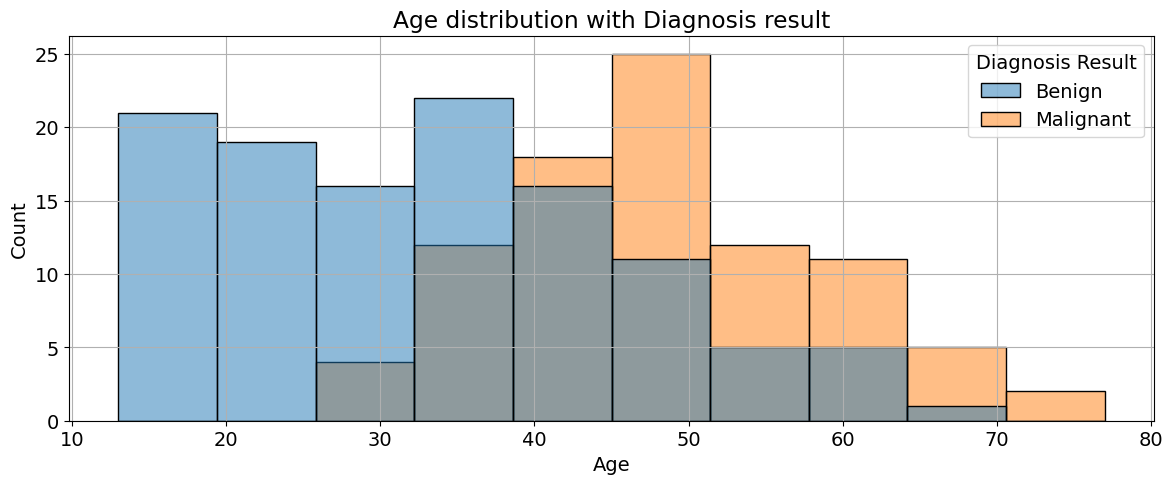

In [44]:
sns.histplot(data=data, x='Age', hue='Diagnosis Result')
plt.title('Age distribution with Diagnosis result')
plt.grid();

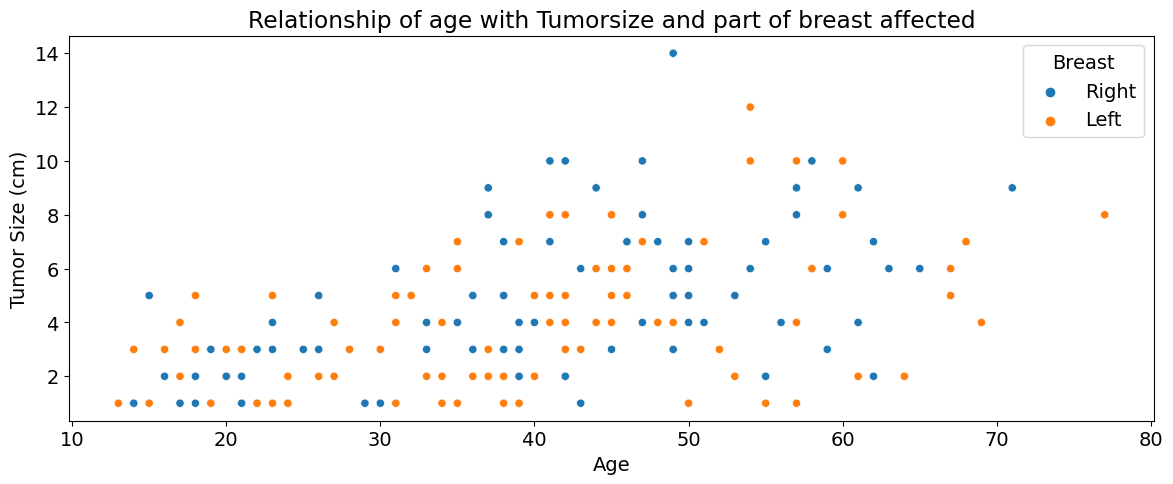

In [45]:
sns.scatterplot(data=data,x='Age', y='Tumor Size (cm)', hue='Breast')
plt.title('Relationship of age with Tumorsize and part of breast affected');

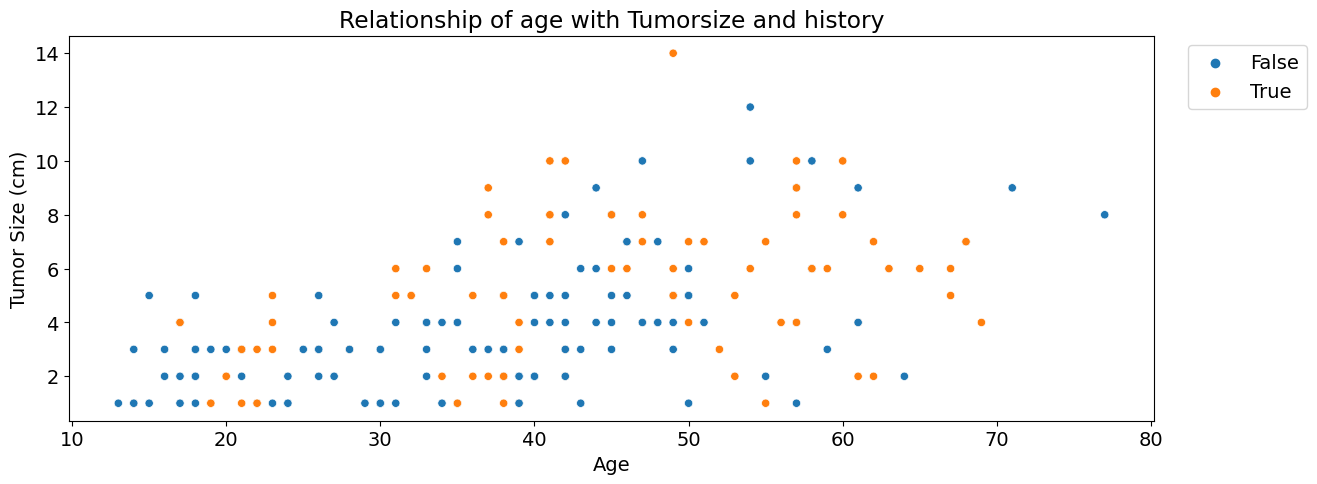

In [46]:
sns.scatterplot(data=data,x='Age', y='Tumor Size (cm)', hue='History')
plt.legend(bbox_to_anchor =(1.15, 1))
plt.title('Relationship of age with Tumorsize and history');

In [47]:
metadata['Menopause']

'Whether the patient is pro or postmenopausal at the time diagnose'

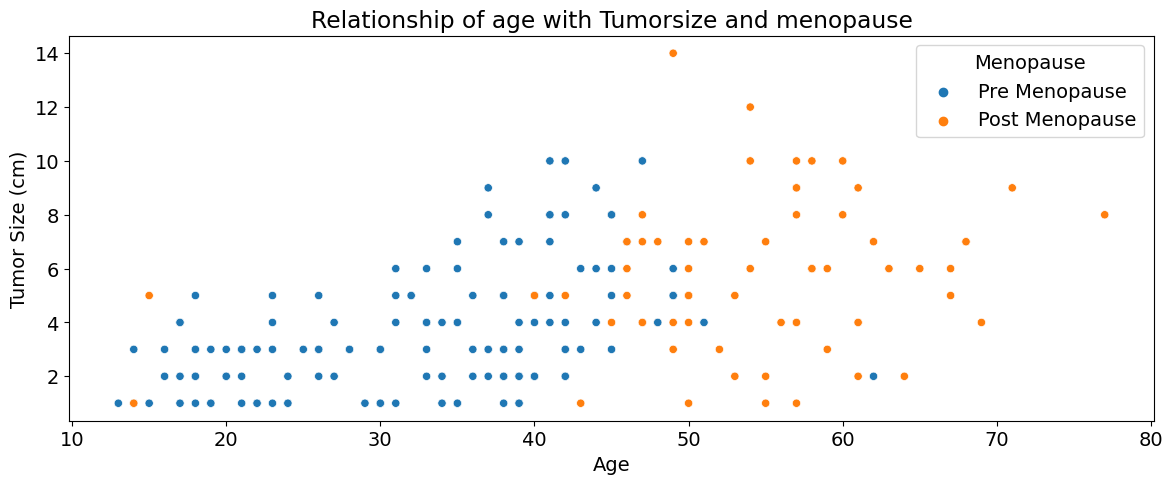

In [48]:
sns.scatterplot(data=data,x='Age', y='Tumor Size (cm)', hue='Menopause')
plt.title('Relationship of age with Tumorsize and menopause');

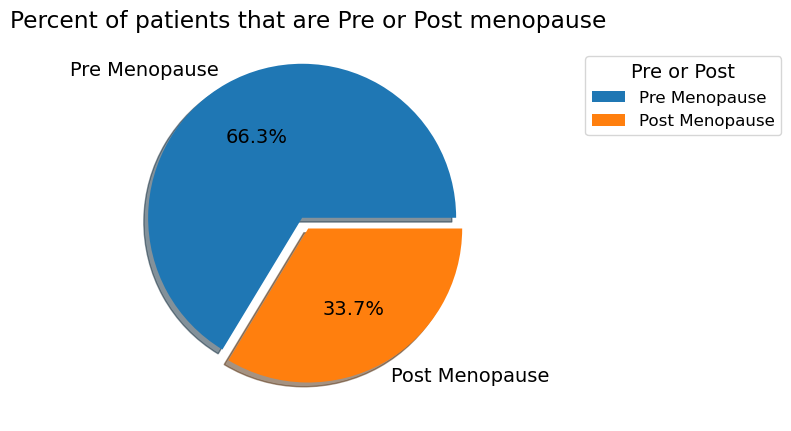

In [49]:
plt.pie(x=data['Menopause'].value_counts(), labels=data['Menopause'].unique(), shadow=True,explode=[0.08,0], autopct ='%.1f%%')
plt.legend(title='Pre or Post', loc = 4,fontsize  = 12, bbox_to_anchor =(1.75, 0.72), ncol = 1)
plt.title('Percent of patients that are Pre or Post menopause');

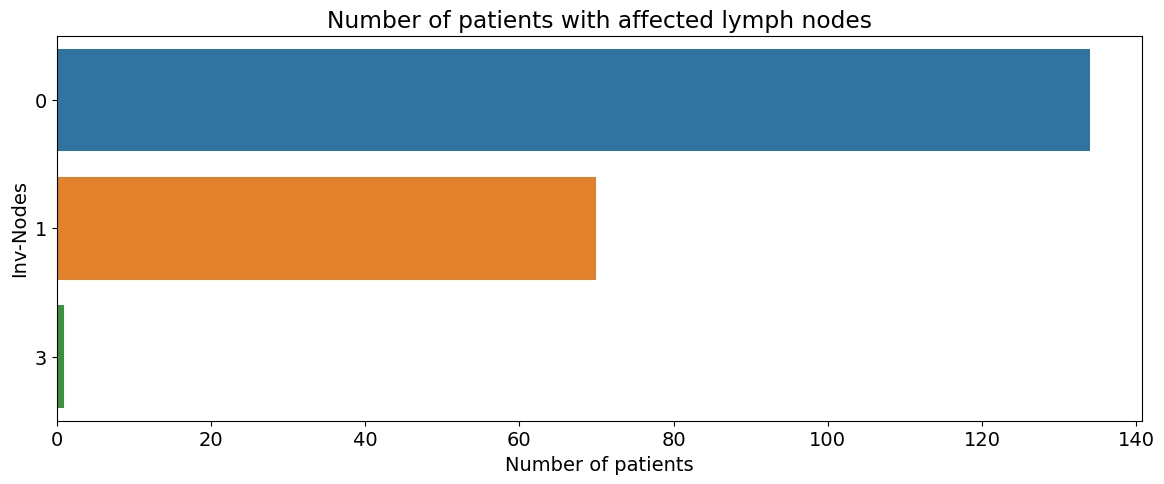

In [50]:
sns.countplot(data=data, y='Inv-Nodes')
plt.title('Number of patients with affected lymph nodes')
plt.xlabel('Number of patients');

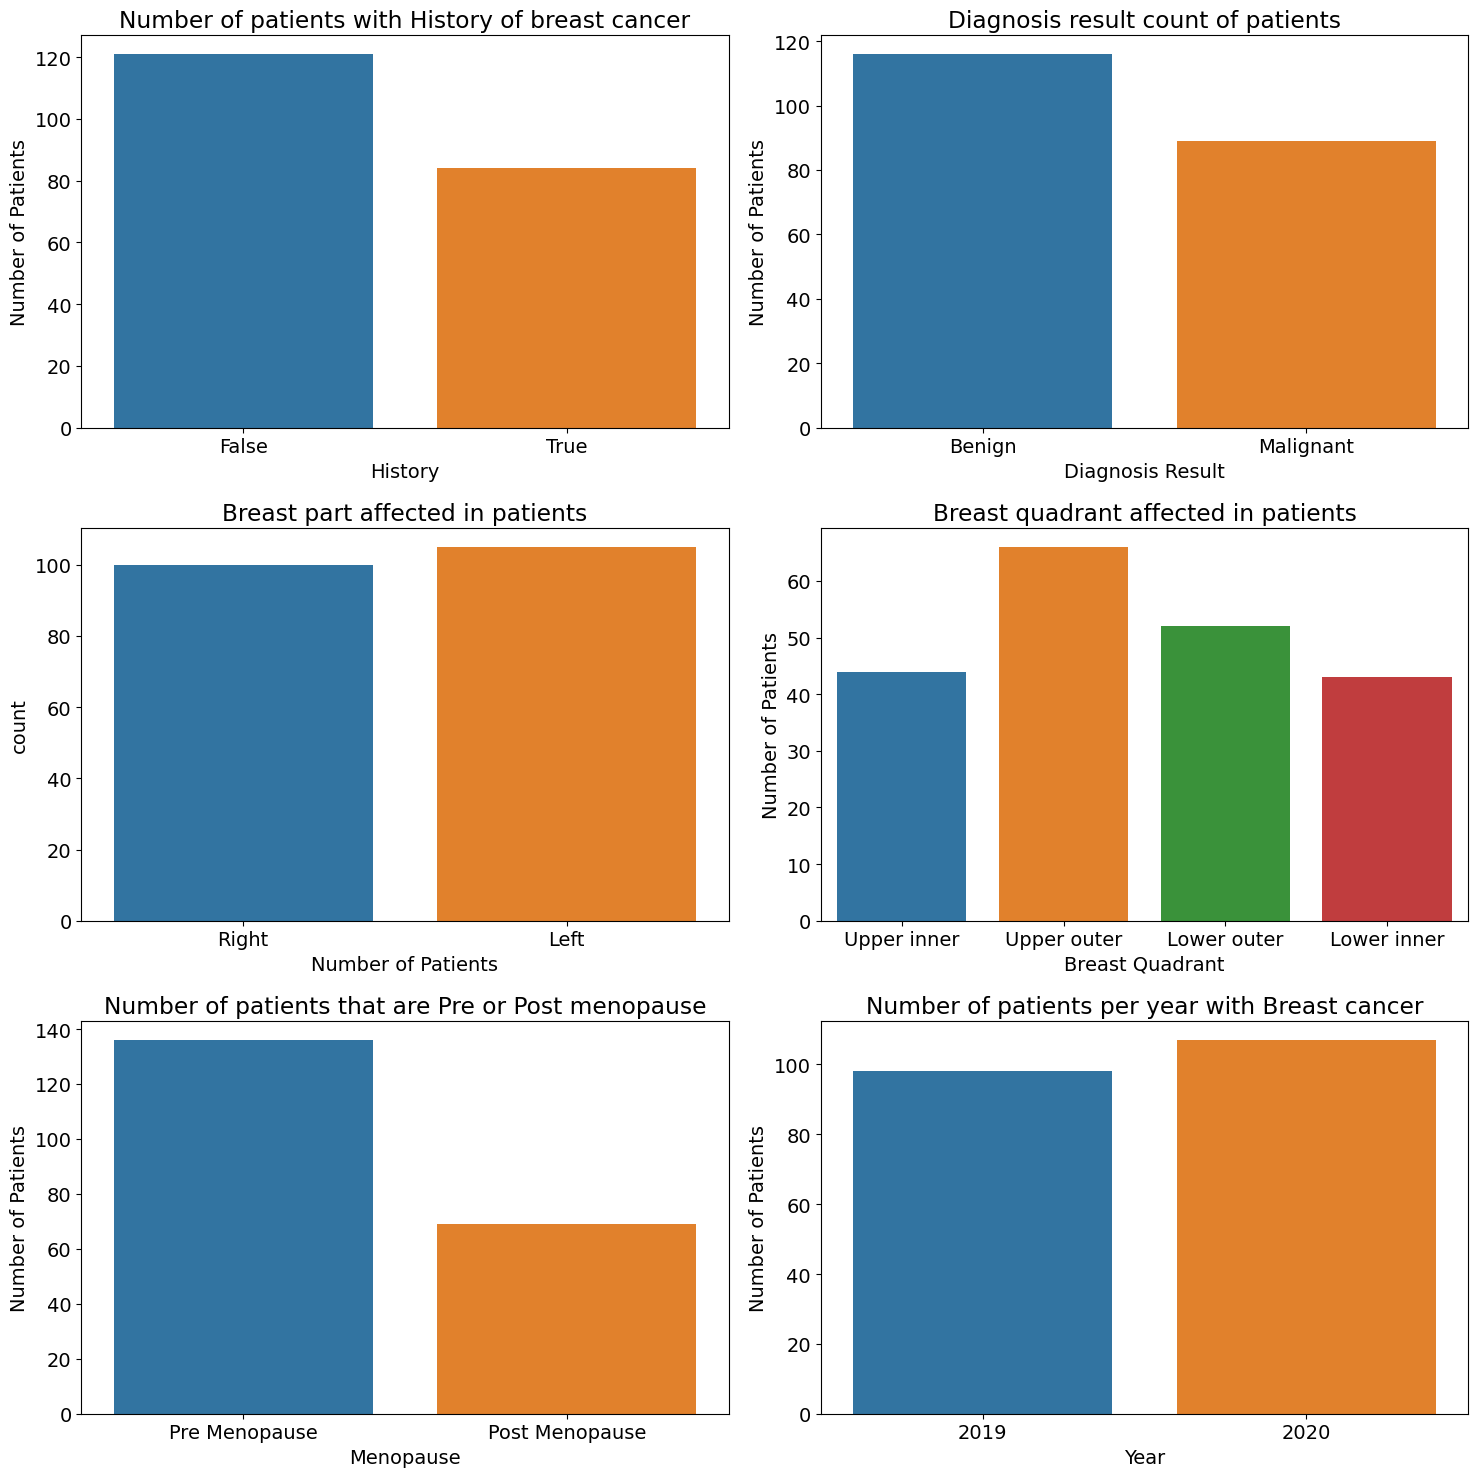

In [51]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.countplot(data=data, x='History')
plt.title('Number of patients with History of breast cancer')
plt.ylabel('Number of Patients')

plt.subplot(3,2,2)
sns.countplot(data=data, x='Diagnosis Result')
plt.title('Diagnosis result count of patients')
plt.ylabel('Number of Patients')

plt.subplot(3,2,3)
sns.countplot(data=data, x='Breast')
plt.title('Breast part affected in patients')
plt.xlabel('Number of Patients')

plt.subplot(3,2,4)
sns.countplot(data=data, x='Breast Quadrant')
plt.title('Breast quadrant affected in patients')
plt.ylabel('Number of Patients')

plt.subplot(3,2,5)
sns.countplot(data=data, x='Menopause')
plt.title('Number of patients that are Pre or Post menopause')
plt.ylabel('Number of Patients')

plt.subplot(3,2,6)
sns.countplot(data=data, x='Year')
plt.title('Number of patients per year with Breast cancer')
plt.ylabel('Number of Patients')

plt.tight_layout()
plt.show;

This marks the end of exploratory analysis and visualization, I've been able to gather some insights and inferences from the dataset, we can now proceed to the next phase of analysis.


# Questions and Answers

## 1. what age group has the highest number of malignant breast cancer?

In [52]:
list1 = list()
for age in data['Age']:
    if age <= 20:
        list1.append('less than 20')    # Creating a new column for the Age group   
    elif age <= 25:
        list1.append('20 to 25')
    elif age <=30:
        list1.append('26 to 30')
    elif age <=35:
        list1.append('31 to 35')
    elif age <=40:
        list1.append('36 to 40')
    elif age <=45:
        list1.append('41 to 45')
    elif age <=50:
        list1.append('46 to 50')
    elif age <=55:
        list1.append('51 to 55')
    elif age <=60:
        list1.append('56 to 60')
    elif age <=65:
        list1.append('61 to 65')
    elif age <=70:
        list1.append('66 to 70')
    else:
        list1.append('older than 70')

data['Age group'] = list1
data.head(5)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
0,1,2019,40,Pre Menopause,2,0,Right,False,Upper inner,False,Benign,36 to 40
1,2,2019,39,Pre Menopause,2,0,Left,False,Upper outer,False,Benign,36 to 40
2,3,2019,45,Post Menopause,4,0,Left,False,Lower outer,False,Benign,41 to 45
3,4,2019,26,Pre Menopause,3,0,Left,False,Lower inner,True,Benign,26 to 30
4,5,2019,21,Pre Menopause,1,0,Right,False,Upper outer,True,Benign,20 to 25


In [53]:
a = data[data['Diagnosis Result'] == 'Malignant']
a['Age group'].value_counts() # Distribution of the Age of patients into their respective Age group

46 to 50         19
41 to 45         18
36 to 40         14
56 to 60         11
51 to 55          8
31 to 35          7
61 to 65          6
66 to 70          4
older than 70     2
Name: Age group, dtype: int64

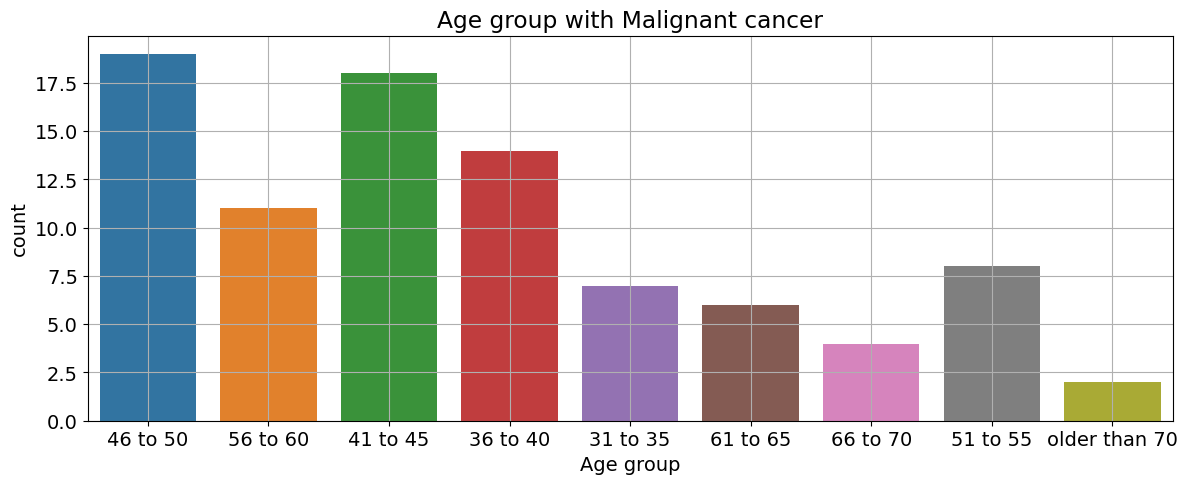

In [54]:
sns.countplot(data=a,x='Age group')
plt.title('Age group with Malignant cancer')
plt.grid();

In [55]:
print('What Age group has the highest number of malignant breast cancer?')
print('Answer: {}'.format(a['Age group'].value_counts().index[0]))

What Age group has the highest number of malignant breast cancer?
Answer: 46 to 50


## 2. How many patients has malignant breast cancer that has undergone metastatic? 

In [56]:
metadata['Metastatic']

'If the cancer has spread to other part of the body or organ'

In [57]:
b = data[(data['Diagnosis Result'] == 'Malignant') & (data['Metastasis'] == True)]
b

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
5,6,2019,50,Post Menopause,5,1,Right,True,Lower outer,False,Malignant,46 to 50
6,7,2019,58,Post Menopause,6,1,Right,True,Upper outer,False,Malignant,56 to 60
11,12,2019,41,Pre Menopause,10,1,Right,True,Lower inner,True,Malignant,41 to 45
12,13,2019,50,Post Menopause,5,1,Right,True,Upper outer,False,Malignant,46 to 50
18,19,2019,38,Pre Menopause,3,1,Right,True,Lower outer,False,Malignant,36 to 40
...,...,...,...,...,...,...,...,...,...,...,...,...
192,201,2020,62,Post Menopause,7,1,Right,True,Upper outer,True,Malignant,61 to 65
196,205,2020,49,Pre Menopause,5,1,Right,True,Upper outer,True,Malignant,46 to 50
198,207,2020,61,Post Menopause,9,1,Right,True,Upper outer,False,Malignant,61 to 65
199,208,2020,40,Post Menopause,5,1,Left,True,Lower outer,False,Malignant,36 to 40


In [58]:
print('How many patients has malignant breast cancer that has undergone metastatic?')
print('Answer: {} Patients'.format(b.shape[0]))

How many patients has malignant breast cancer that has undergone metastatic?
Answer: 67 Patients


## 3. Does Breast cancer targets a Specific part of the breast mostly?

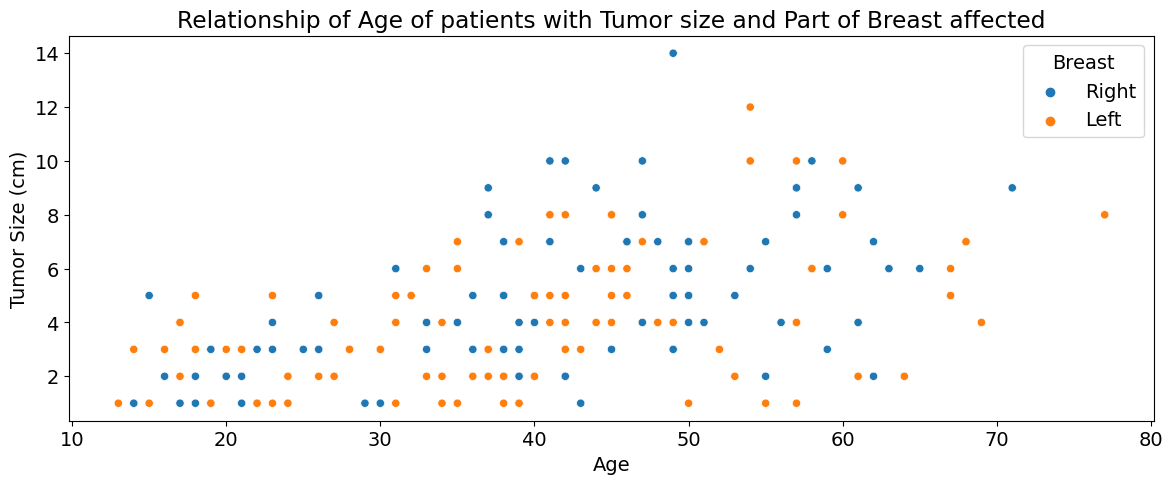

In [59]:
sns.scatterplot(data=data, x='Age', y='Tumor Size (cm)', hue='Breast')
plt.title('Relationship of Age of patients with Tumor size and Part of Breast affected');

From the look of the Scatterplot above, there is a non uniform relationship of the part of breast affected by cancer with age and tumorsize, meaning it can occur on any part of the breast.

So Breast cancer does not targets a specififc part of the breast, it's just occurs anywhere

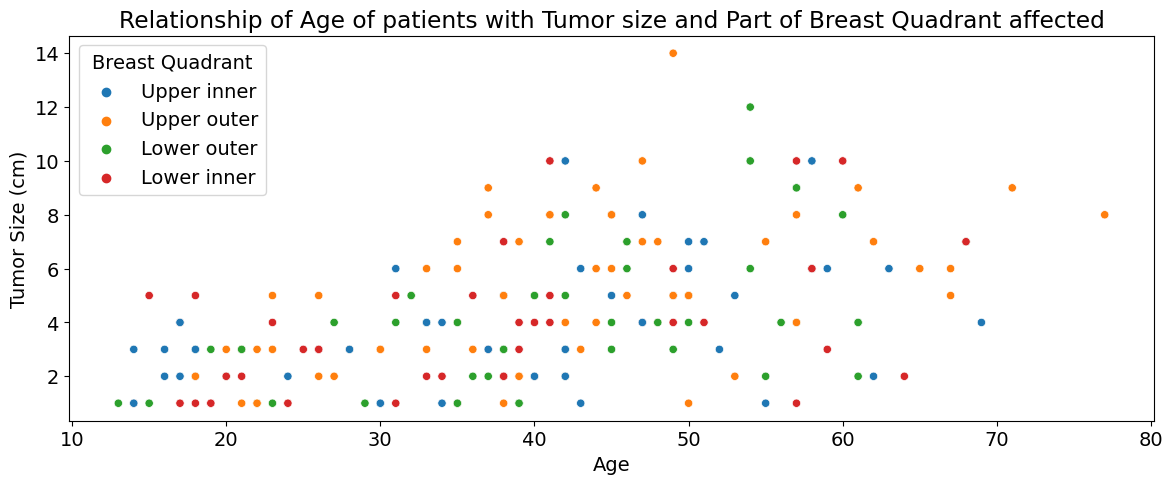

In [60]:
sns.scatterplot(data=data, x='Age', y='Tumor Size (cm)', hue='Breast Quadrant')
plt.title('Relationship of Age of patients with Tumor size and Part of Breast Quadrant affected');

Same here also with this Scatterplot, it has no relationship with the breast quadrant being affected, it's just occurs anywhere irrespective of Age or Tumor size

In [61]:
print('Does Breast cancer targets a Specific part of the breast mostly?')
print('Answer: NO')

Does Breast cancer targets a Specific part of the breast mostly?
Answer: NO


## 4. For those who are post menopause, what's the most common diagnosis result?

In [62]:
c = data[data['Menopause'] == 'Post Menopause']
c['Diagnosis Result'].value_counts()

Malignant    48
Benign       21
Name: Diagnosis Result, dtype: int64

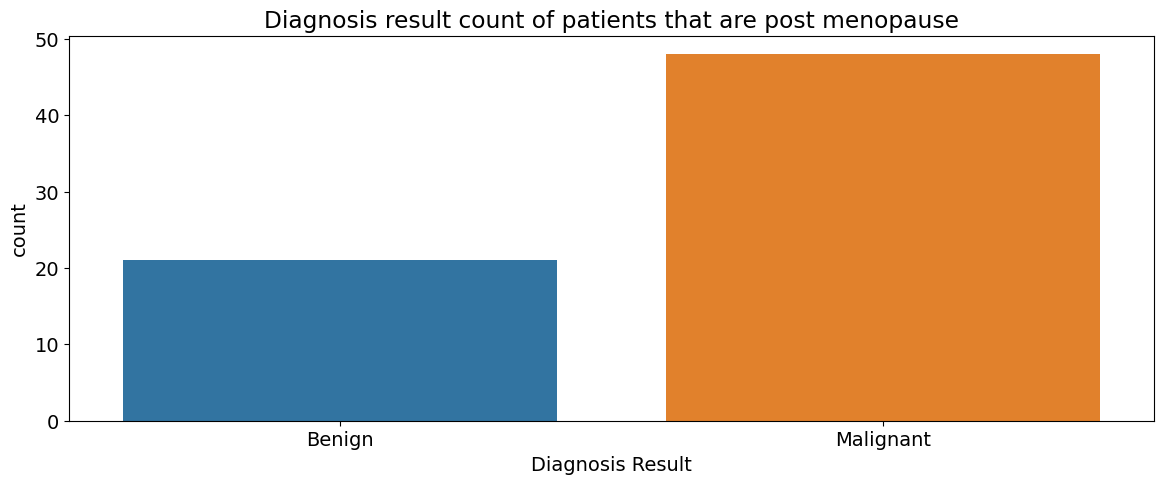

In [63]:
sns.countplot(data=c, x='Diagnosis Result')
plt.title('Diagnosis result count of patients that are post menopause');

In [64]:
print("For those who are post menopause, what's the most common diagnosis result?")
print("Answer: {}".format(c['Diagnosis Result'].value_counts().index[0]))

For those who are post menopause, what's the most common diagnosis result?
Answer: Malignant


## 5. How many patients had Benign Diagnosis and has not undergone metastasis?

In [65]:
d = data[(data['Diagnosis Result'] == 'Benign')&(data['Metastasis'] == 'False')]
d

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group


In [66]:
print('How many patients had Benign Diagnosis and has not undergone metastasis?')
print('Answer: {}'.format(d.shape[0]))

How many patients had Benign Diagnosis and has not undergone metastasis?
Answer: 0


## 6. How many pre menopause patients had Malignant diagnosis?

In [67]:
e = data[(data['Menopause'] == 'Pre Menopause')&(data['Diagnosis Result'] == 'Malignant')]
e

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
11,12,2019,41,Pre Menopause,10,1,Right,True,Lower inner,True,Malignant,41 to 45
13,14,2019,43,Pre Menopause,6,1,Right,False,Upper inner,False,Malignant,41 to 45
18,19,2019,38,Pre Menopause,3,1,Right,True,Lower outer,False,Malignant,36 to 40
22,23,2019,45,Pre Menopause,6,1,Left,True,Upper outer,True,Malignant,41 to 45
27,28,2019,31,Pre Menopause,5,0,Left,False,Lower inner,True,Malignant,31 to 35
29,30,2019,42,Pre Menopause,3,0,Left,False,Lower outer,True,Malignant,41 to 45
31,33,2019,40,Pre Menopause,2,0,Left,True,Upper outer,False,Malignant,36 to 40
33,35,2019,31,Pre Menopause,6,1,Right,True,Upper inner,True,Malignant,31 to 35
38,40,2019,45,Pre Menopause,5,1,Left,True,Upper inner,False,Malignant,41 to 45
40,43,2019,37,Pre Menopause,8,1,Right,True,Upper outer,True,Malignant,36 to 40


In [68]:
e.shape

(41, 12)

In [69]:
print("""How many pre menopause patients had Malignant diagnosis?
Answer: {} Patients""".format(e.shape[0]))

How many pre menopause patients had Malignant diagnosis?
Answer: 41 Patients


## 7. Does Tumor size affects the Diagnosis result(i.e does the size of the tumor affects whether it's gonna be benign or malignant)?

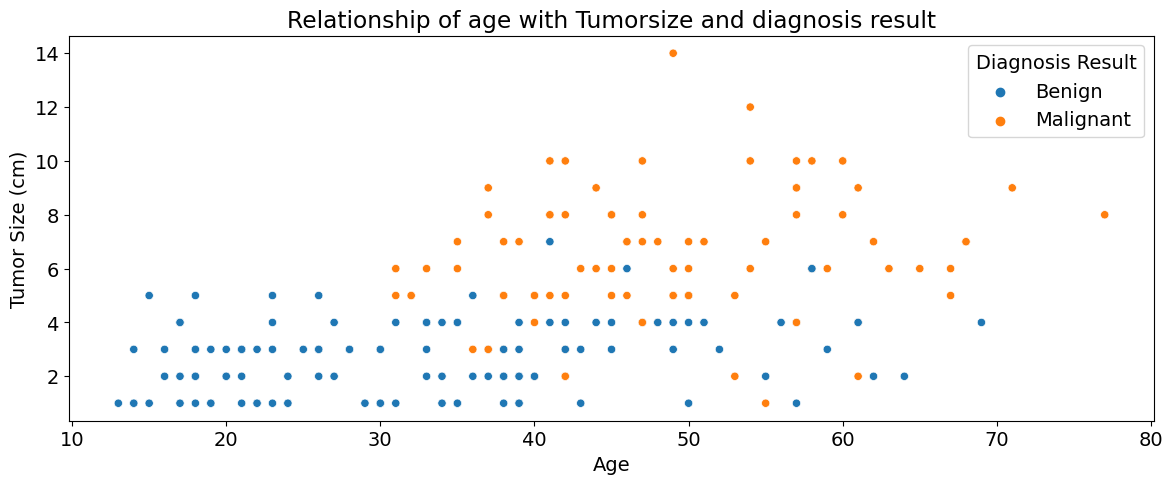

In [70]:
sns.scatterplot(data=data,x='Age', y='Tumor Size (cm)', hue='Diagnosis Result')
plt.title('Relationship of age with Tumorsize and diagnosis result');

From the Scatterplot above, we can deduce that most of the Tumor size above 5cm are Malignant and they are more packed up there and most of the tumor size below 5cm are benign except for a few of them that are small and Malignant.

so we can say that in most cases the larger the tumor size the more likely it will be Malignant and Vice versa.

In [71]:
print("""Does Tumor size affects the Diagnosis result?
Answer: Yes in most cases""")

Does Tumor size affects the Diagnosis result?
Answer: Yes in most cases


## 8. What's the mean age for those with tumour size 10 and above?

In [72]:
f = data[data['Tumor Size (cm)'] >= 10]
f.sample(4)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
85,90,2019,54,Post Menopause,10,1,Left,True,Lower outer,False,Malignant,51 to 55
125,130,2020,58,Post Menopause,10,1,Right,True,Upper inner,False,Malignant,56 to 60
121,126,2020,54,Post Menopause,12,1,Left,True,Lower outer,False,Malignant,51 to 55
20,21,2019,60,Post Menopause,10,1,Left,True,Lower inner,True,Malignant,56 to 60


In [73]:
mean_age = int(np.mean(f.Age))
mean_age

51

In [74]:
print('''
What's the mean age for those with tumour size 10 and above?
Answer: {} years'''.format(mean_age))


What's the mean age for those with tumour size 10 and above?
Answer: 51 years


## 9. what's the standard deviation for age of those with benign diagnosis?

In [75]:
g = data[data['Diagnosis Result'] == 'Benign']
g.sample(5)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
39,42,2019,38,Pre Menopause,2,0,Left,False,Lower inner,False,Benign,36 to 40
201,210,2020,28,Pre Menopause,3,0,Left,False,Upper inner,False,Benign,26 to 30
45,49,2019,17,Pre Menopause,1,0,Right,False,Lower inner,False,Benign,less than 20
204,213,2020,50,Post Menopause,4,0,Right,False,Lower outer,True,Benign,46 to 50
84,89,2019,24,Pre Menopause,1,0,Right,False,Upper outer,False,Benign,20 to 25


In [76]:
age_dev = int(np.std(g.Age))
age_dev

13

In [77]:
print('''
what's the standard deviation for age of those with benign diagnosis?
Answer: {} years'''.format(age_dev))


what's the standard deviation for age of those with benign diagnosis?
Answer: 13 years


## 10. 25, 50, 75 and 100 percent of patients had what tumour size?

In [78]:
A = np.percentile(data['Tumor Size (cm)'], 25)
B = np.percentile(data['Tumor Size (cm)'], 50)
C = np.percentile(data['Tumor Size (cm)'], 75)
D = np.percentile(data['Tumor Size (cm)'], 100)

print(A, B, C, D)

2.0 4.0 6.0 14.0


In [79]:
print('''
25 percentile: {}
50 percentile: {}
75 percentile: {}
100 percentile: {}'''.format(A,B,C,D))


25 percentile: 2.0
50 percentile: 4.0
75 percentile: 6.0
100 percentile: 14.0


# Inferences and Conclusions

From the Exploratory Analysis and Visualization along with the answers to the questions from the Dataset, I was able to come up with some inferences and conclusions concerning the data. which are;

>1. In most Cases of breast cancer with patients, the larger the tumor size, the more likely it's going to be Malignant Diagnosis and the lesser the tumor size, the more likely it's gonna be Benign.

>2. Breast cancer does not targets a particular or specific part of the Breast, it just happens to occur on anywhere or part of the breast

>3. Breast cancer Diagnosis result that are Benign can still be Treated and Cured but those of Malignant Diagnosis is late and cannot be cured, but with the Advancement in the medical health sectors, those with Malignant Diagnosis can still be treated to live longer.
it

>4. The causes of this Breast cancer could be Hereditary (transmitted from mother to daughter). It can also be caused by Environmental factors such as exposure to dangerous radiation, some toxic food one eats ETC.

>5. Also, I noticed that most women who are pre menopause had Benign diagnosis and then most of the women who were post menopause had Malignant diagnosis. It's most likely that these women weren't sensitized when they were younger and have left it for a while till it finally got worse. so we should try and be enlightened and should always talk on the little matters that disturbs one before things gets worse cause it might be too late by then.

### **Note**
**All these inferences and conclusions made are all limited to this dataset worked with. Furthermore, the data reflects patients from a single hospital, limiting the generalizability of the findings to wider populations.**


# Reference

1. https://en.m.wikipedia.org/wiki/Breast_cancer

2. https://www.cancer.org/cancer/types/breast-cancer/about/what-is-breast-cancer.html

In [80]:
data.to_csv(r'C:\Users\MR ADEMOLA\Desktop\New folder (2)\3\cleaned-breast-cancer-dataset.csv', index=None, header=True)
# Saving the Cleaned modified Dataset in a new CSV file as 'cleaned-breast-cancer-dataset.csv'

In [81]:
os.listdir(r'C:\Users\MR ADEMOLA\Desktop\New folder (2)\3')
# Checking for its location to confirmed if it has been saved or not

['breast-cancer-dataset.csv',
 'breast-cancer-metadata.csv',
 'cleaned-breast-cancer-dataset.csv',
 'excel_cleaned_breast-cancer-dataset.csv']



# Statistical analysis

In [82]:
data.sample(5)

,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result,Age group
84,89,2019,24,Pre Menopause,1,0,Right,False,Upper outer,False,Benign,20 to 25
185,194,2020,35,Pre Menopause,1,0,Left,False,Lower outer,True,Benign,31 to 35
121,126,2020,54,Post Menopause,12,1,Left,True,Lower outer,False,Malignant,51 to 55
0,1,2019,40,Pre Menopause,2,0,Right,False,Upper inner,False,Benign,36 to 40
111,116,2020,23,Pre Menopause,3,0,Right,False,Upper outer,True,Benign,20 to 25


## Logistic regression

In [83]:
from sklearn import linear_model # importing python library for calculating Regression

In [84]:
x = np.array(data[['Tumor Size (cm)']]) # independent variable
y = np.array(data[['Diagnosis Result']])[:, 0] # dependent variable

In [85]:
logr = linear_model.LogisticRegression() 
logr.fit(x,y) # logistic regression model

LogisticRegression()

In [86]:
prdicted=logr.predict(np.array([4]).reshape(-1, 1)) # model Prediction
print(prdicted)

['Benign']


In [87]:
data[data['Tumor Size (cm)'] == 4]['Diagnosis Result'].value_counts() # Actual Variable

Benign       26
Malignant     5
Name: Diagnosis Result, dtype: int64

In [88]:
logr.score(x,y) # logistic regression model evaluation

0.8829268292682927

has a good relationship!

In [89]:
log_odds = logr.coef_
odds = np.exp(log_odds)  # Coefficient

print(odds)

[[2.89130113]]


## Multiple logistic regression

In [90]:
model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs') # building regression model

In [91]:
x = np.array(data[['Tumor Size (cm)', 'Age']]) # independent variable
y = np.array(data[['Diagnosis Result']])[:, 0] # dependent variable

In [92]:
model.fit(x,y) # multinomial logistic regression model

LogisticRegression(multi_class='multinomial')

In [93]:
prediction = model.predict(np.array([5, 60]).reshape(1, -1)) # multinomial logistic regression model prediction
prediction

array(['Malignant'], dtype=object)

In [94]:
model.score(x,y) # multiple logistic regression model evaluation

0.8634146341463415

has a good relationship!

**This marks the end of the Project on Analysis of the Breast cancer dataset.**